# Analyse du fichier concaténé 

In [23]:
import os
import pandas as pd

In [24]:
# lecture du fichier (pour vérifier que cela fonctionne)
data_folder = os.path.join(os.getcwd(), '../data_original')
df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')

C:\Users\sacha\AppData\Local\Temp\ipykernel_2772\2417836581.py:3: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')


On a un message "warning" indiquant que certaines colonnes ont plusieurs types, on va investiguer cela.

In [25]:
for col in df.columns:
    print(f"{col:<25} : {df[col].apply(type).unique()}")

Date/heure transaction    : [<class 'str'>]
ID acheteur               : [<class 'int'>]
Nom point de vente        : [<class 'str'> <class 'float'>]
Article                   : [<class 'str'>]
Famille d'article         : [<class 'str'> <class 'float'>]
Prix unitaire TTC         : [<class 'float'>]
Quantité                  : [<class 'float'>]
Total TTC                 : [<class 'float'>]
Activité                  : [<class 'float'> <class 'str'>]


"Nom point de vente", "Famille d'article" et "Activité" sont des colonnes qui ont plusieurs types, et qui ne sont censés avoir que des "str".

In [26]:
# Affichage de toutes les différentes valeurs des colonnes (commenté car prend de la place)
# print(df["Nom point de vente"].unique())
# print(df["Famille d'article"].unique())
# print(df["Activité"].unique())

# Affichage des valeurs de type float des colonnes
print(df[df['Nom point de vente'].apply(type) == float]['Nom point de vente'].unique())
print(df[df['Famille d\'article'].apply(type) == float]['Famille d\'article'].unique())
print(df[df['Activité'].apply(type) == float]['Activité'].unique())

[nan]
[nan]
[nan]


Dans les trois cas, l'apparition d'un nouveau type est dû à la présence de valeurs manquantes, et non de valeurs mal typées, le problème des valeurs manquantes sera adressé plus tard dans le projet.

On peut compter le nombre de valeurs manquantes par colonne :

In [27]:
cols = ['Nom point de vente', 'Famille d\'article', 'Activité']
for col in cols:
    print(f"{col:<25} : {df[col].isna().sum()}", end=' ')
    print(f"({df[col].isna().sum() / df.shape[0] * 100:.8f}%)")

Nom point de vente        : 1126272 (56.48361568%)
Famille d'article         : 84 (0.00421268%)
Activité                  : 1771384 (88.83659816%)


On peut également afficher les valeurs manquantes avec un heatmap pour avoir une idée de la répartition des valeurs manquantes :

<Axes: >

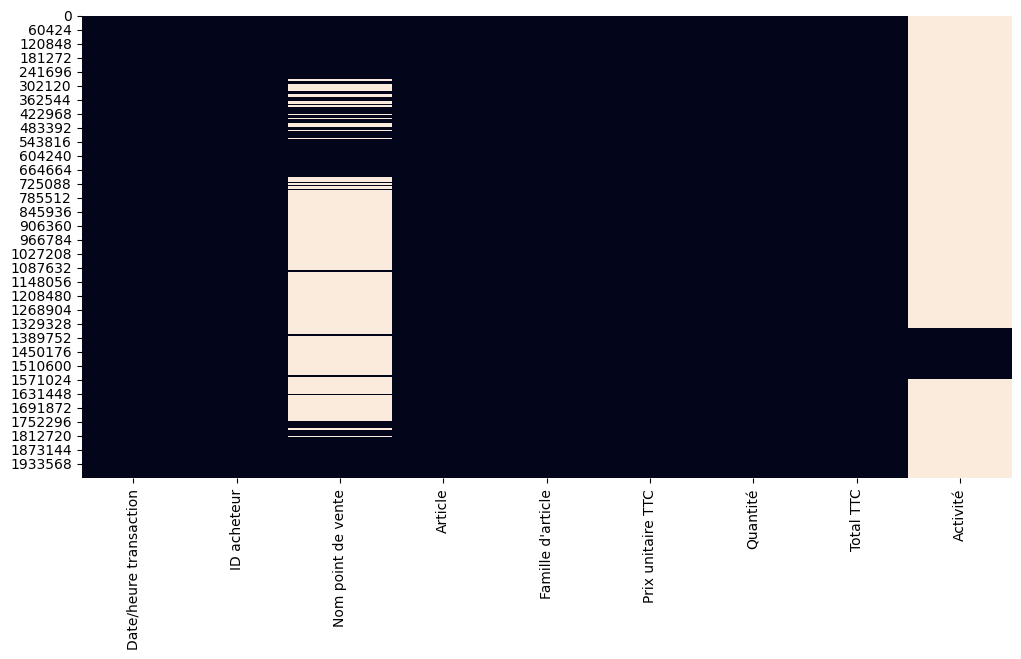

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)

Il y a principalement des valeurs manquantes dans "Nom point de vente" et "Activité", colonnes qui ne nous seront uniquement utiles pour mieux repérer les données à nettoyer.

"Famille d'article" à très peu de valeurs manquantes, elles pourront soit être devinées, soit on pourra supprimer ces lignes (84 négligeable dans 1M).

Le dataset est très complet, ce qui n'est pas forcément commun en data-science, cela va beaucoup nous aider.